## Practice 1 - Linear Regression

In [ ]:
#!pip install wandb
!pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#import wandb

In [19]:
df = pd.read_pickle("https://archive.org/download/ages-and-heights/AgesAndHeights.pkl")

df.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


In [21]:
df.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [22]:
df['Age'] = np.ceil(df['Age']) 
df['Height'] = np.round(df['Height'], 2)
df.head()

,Age,Height
0,15.0,59.63
1,4.0,36.15
2,8.0,46.91
3,2.0,29.13
4,17.0,68.17


In [23]:
df.describe()

,Age,Height
count,100.000000,100.000000
mean,8.450000,45.955900
std,5.364257,10.787277
min,-0.000000,27.330000
25%,3.750000,36.322500
50%,8.000000,46.175000
75%,12.000000,53.997500
max,18.000000,68.170000


In [15]:
df.isna().sum()

Age       0
Height    0
dtype: int64

In [27]:
#remove anomalies - negative values
#filter the Ages less than 0 ( delete them)
new_df = df[df['Age'] > 0]

new_df.describe()

,Age,Height
count,93.000000,93.000000
mean,9.086022,47.164731
std,5.012280,10.189845
min,1.000000,29.010000
25%,6.000000,38.290000
50%,9.000000,47.330000
75%,12.000000,54.750000
max,18.000000,68.170000


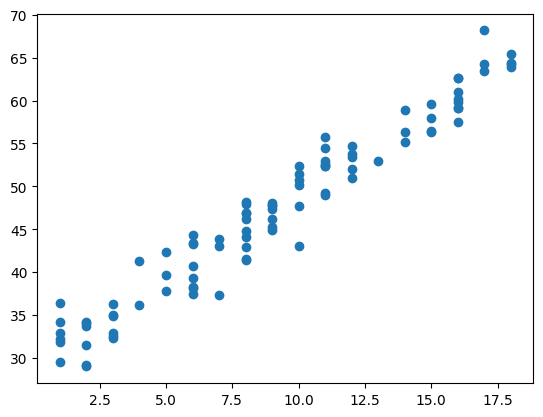

In [28]:
plt.scatter(new_df['Age'], new_df['Height'])

In [29]:
new_df.corr()

,Age,Height
Age,1.000000,0.973979
Height,0.973979,1.000000


In [30]:
new_df.corr().style.background_gradient(cmap='coolwarm')

,Age,Height
Age,1.000000,0.973979
Height,0.973979,1.000000


Train-Test Split

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( new_df['Age'], new_df['Height'], train_size=0.7,
                                                     random_state=15)

In [74]:
print("X (train, test) samples: ",X_train.shape, X_test.shape)
print("Y (train, test) samples: ",Y_train.shape, Y_test.shape)

X (train, test) samples:  (65,) (28,)
Y (train, test) samples:  (65,) (28,)


In [87]:
X_train.values.reshape(-1, 1) 

array([[18.],
       [ 8.],
       [15.],
       [11.],
       [ 9.],
       [16.],
       [16.],
       [10.],
       [ 2.],
       [ 6.],
       [10.],
       [11.],
       [11.],
       [16.],
       [15.],
       [ 8.],
       [18.],
       [ 8.],
       [ 8.],
       [ 5.],
       [17.],
       [ 5.],
       [ 8.],
       [13.],
       [18.],
       [11.],
       [ 8.],
       [12.],
       [ 1.],
       [ 9.],
       [ 8.],
       [ 1.],
       [ 2.],
       [ 1.],
       [15.],
       [ 6.],
       [16.],
       [16.],
       [ 4.],
       [ 4.],
       [16.],
       [ 8.],
       [10.],
       [ 3.],
       [16.],
       [ 2.],
       [ 6.],
       [ 6.],
       [17.],
       [ 9.],
       [ 9.],
       [11.],
       [ 6.],
       [ 7.],
       [ 2.],
       [ 1.],
       [10.],
       [12.],
       [11.],
       [ 8.],
       [ 3.],
       [15.],
       [ 6.],
       [16.],
       [ 9.]])

In [88]:
X_train.values.reshape(-1, 1) 

array([[18.],
       [ 8.],
       [15.],
       [11.],
       [ 9.],
       [16.],
       [16.],
       [10.],
       [ 2.],
       [ 6.],
       [10.],
       [11.],
       [11.],
       [16.],
       [15.],
       [ 8.],
       [18.],
       [ 8.],
       [ 8.],
       [ 5.],
       [17.],
       [ 5.],
       [ 8.],
       [13.],
       [18.],
       [11.],
       [ 8.],
       [12.],
       [ 1.],
       [ 9.],
       [ 8.],
       [ 1.],
       [ 2.],
       [ 1.],
       [15.],
       [ 6.],
       [16.],
       [16.],
       [ 4.],
       [ 4.],
       [16.],
       [ 8.],
       [10.],
       [ 3.],
       [16.],
       [ 2.],
       [ 6.],
       [ 6.],
       [17.],
       [ 9.],
       [ 9.],
       [11.],
       [ 6.],
       [ 7.],
       [ 2.],
       [ 1.],
       [10.],
       [12.],
       [11.],
       [ 8.],
       [ 3.],
       [15.],
       [ 6.],
       [16.],
       [ 9.]])

In [89]:
Y_train.values

array([64.39, 41.42, 57.98, 52.34, 44.95, 62.68, 59.1 , 43.04, 34.25,
       40.7 , 51.45, 54.53, 52.34, 60.23, 56.36, 46.21, 64.31, 42.91,
       46.91, 37.83, 68.17, 39.67, 46.86, 52.92, 65.39, 52.92, 41.58,
       53.45, 32.18, 47.71, 44.14, 29.51, 29.01, 31.83, 56.46, 43.29,
       59.13, 60.99, 36.15, 41.31, 57.54, 47.99, 47.75, 32.3 , 62.64,
       31.52, 37.44, 38.1 , 63.39, 45.3 , 46.14, 49.22, 38.29, 37.36,
       33.78, 32.94, 50.13, 50.95, 48.99, 48.22, 32.56, 59.63, 44.35,
       59.87, 47.33])

build model

In [90]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()


train model (learning)

In [91]:
lr_model.fit(X_train.values.reshape(-1, 1) , Y_train.values.reshape(-1, 1))

LinearRegression()

In [92]:
lr_model.intercept_

array([28.58027034])

In [93]:
lr_model.coef_

array([[2.00424785]])

In [94]:
# Height = coeff_Age * Age + Intercept 
(lr_model.coef_ * 12) + lr_model.intercept_

array([[52.63124454]])

predict Y based on the X_test (30%)

In [95]:
Y_pred = lr_model.predict(X_test.values.reshape(-1, 1))


In [96]:
X_test[:5]

C:\Users\eben\AppData\Local\Temp\ipykernel_13492\2325576690.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_test[:5]


93    12.0
85     6.0
43    10.0
15     1.0
28     3.0
Name: Age, dtype: float64

In [97]:
Y_pred[:5]

array([[52.63124454],
       [40.60575744],
       [48.62274884],
       [30.58451819],
       [34.59301389]])

In [98]:
Y_test[:5]

C:\Users\eben\AppData\Local\Temp\ipykernel_13492\3341063026.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Y_test[:5]


93    53.82
85    43.41
43    52.32
15    34.25
28    35.01
Name: Height, dtype: float64

evaluate model

In [99]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Mean Absolute Error:", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("R-squared: ", r2_score(Y_test, Y_pred))

print("Accuracy: ", lr_model.score(X_test.values.reshape(-1, 1), Y_test.values.reshape(-1, 1)),"%")

Mean Absolute Error: 1.9248361793172328
Mean Squared Error:  5.704376394316445
RMSE:  2.388383636335764
R-squared:  0.9394082860024329
Accuracy:  0.9394082860024329 %
